In [3]:
import pandas as pd
from google.oauth2 import service_account
from google.cloud import bigquery


In [79]:
query = """
SELECT
    `NU_NOTA_CH`
    + `NU_NOTA_CN`
    + `NU_NOTA_LC`
    + `NU_NOTA_MT`
    + `NU_NOTA_REDACAO` AS nota,
FROM `brasil-aberto-443222.microdados_abertos.enem` AS enem
INNER JOIN `brasil-aberto-443222.microdados_abertos.municipios_ips` AS ips
    ON (
        ips.codigo = CAST(enem.`CO_MUNICIPIO_PROVA` AS STRING)
    )
WHERE
    `NU_NOTA_CH`
    + `NU_NOTA_CN`
    + `NU_NOTA_LC`
    + `NU_NOTA_MT`
    + `NU_NOTA_REDACAO`
    > 0
AND enem.`Q006` = 'P'
AND enem.`IN_TREINEIRO` != 1
AND enem.`TP_ESCOLA` = 3
AND enem.`CO_MUNICIPIO_PROVA` IS NOT NULL
AND enem.`SG_UF_PROVA` IN ('GO', 'DF', 'MT', 'MS')
"""


In [80]:
def client(credentials: str) -> bigquery.Client:
    """
    Create a BigQuery client using the provided credentials.

    Args:
        credentials (str): Path to the service account key file.

    Returns:
        bigquery.Client: BigQuery client.
    """
    credentials = service_account.Credentials.from_service_account_file(
        "credentials.json"
    )

    return bigquery.Client("brasil-aberto-443222", credentials=credentials)

def fetch_data(client: bigquery.Client, query: str) -> pd.DataFrame:
    """
    Fetch data from BigQuery using the provided query.

    Args:
        query (str): SQL query to execute.

    Returns:
        pd.DataFrame: DataFrame containing the query results.
    """
    df = client.query(query).to_dataframe()

    return df



In [81]:
client = client("credentials.json")
df = fetch_data(client, query)

In [82]:
df.head()

,nota
0,3031.4
1,3279.3
2,3343.1
3,3286.1
4,3437.7


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

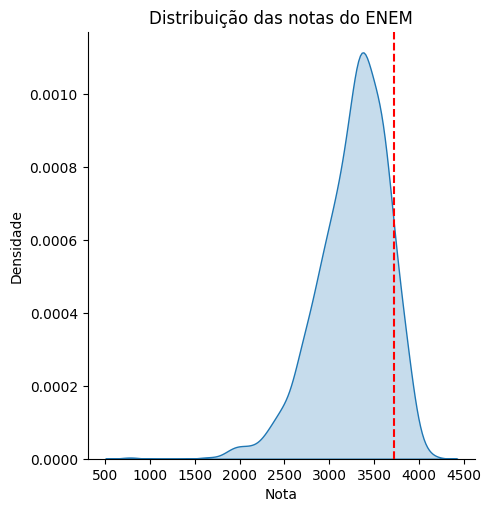

In [84]:
sns.displot(df.nota, kind="kde", fill=True)
plt.title("Distribuição das notas do ENEM")

plt.xlabel("Nota")
plt.ylabel("Densidade")

# line on x=3725
plt.axvline(x=3725, color="red", linestyle="--", label="Nota média")
plt.show()

In [86]:
df[df["nota"] >= 3725].shape[0] / df.shape[0] * 100


9.27914110429448